# CHAPTER 06 - 차원 축소

- 피처 선택(feature selction)
    - 중요하지 않은 피처 삭제하고 고려
- 피처 추출(feature extraction)
    - 기존 피처를 압축(반영)
    - PCA, SVD, NMF
    - 과적합 영향력 작아짐
    - 이미지 분류
    - 텍스트 의미 찾기 (SVD, NMF)
    

## 02. PCA(Principal Component Analysis)

- 가장 높은 분산을 가지는 데이터 축을 찾아 이 축으로 차원 축소(분산 데이터 특성 잘 나타내는 것으로 간주)


In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()

columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

iris_df = pd.DataFrame(iris.data, columns = columns)
iris_df["target"] = iris.target
iris_df.head(3)


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


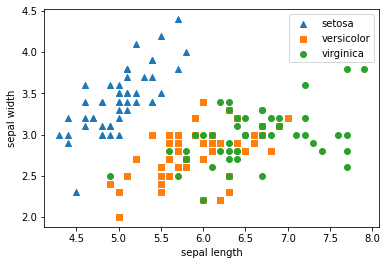

In [2]:
markers = ["^", "s", "o"]

for i, marker in enumerate(markers):
    x_axis_data = iris_df[iris_df["target"] == i]["sepal_length"]
    y_axis_data = iris_df[iris_df["target"] == i]["sepal_width"]
    plt.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.target_names[i])

plt.legend()
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.show()


In [3]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(iris_df.iloc[:, :-1])

from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [4]:
pca_columns = ["pca_component_1", "pca_component_2"]
iris_df_pca = pd.DataFrame(iris_pca, columns = pca_columns)
iris_df_pca["target"] = iris.target
iris_df_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


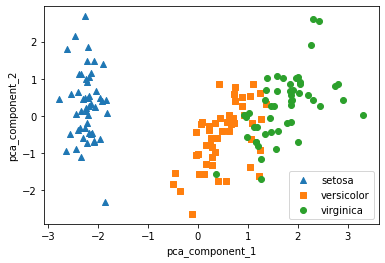

In [5]:
for i, marker in enumerate(markers):
    x_axis_data = iris_df_pca[iris_df_pca["target"] == i]["pca_component_1"]
    y_axis_data = iris_df_pca[iris_df_pca["target"] == i]["pca_component_2"]
    plt.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.target_names[i])

plt.legend()
plt.xlabel("pca_component_1")
plt.ylabel("pca_component_2")
plt.show()


In [6]:
print(pca.explained_variance_ratio_)
# 원본 데이터 변동성 설명 비율 퍼센트 합 : 95

[0.72962445 0.22850762]


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state = 156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring = "accuracy", cv = 3)
print("개별 정확도", scores)
print("평균", np.mean(scores))


개별 정확도 [0.98 0.94 0.96]
평균 0.96


In [8]:
scores_pca = cross_val_score(rcf, iris_df_pca[["pca_component_1", "pca_component_2"]], iris.target, scoring = "accuracy", cv = 3)

print("개별 정확도", scores_pca)
print("평균", np.mean(scores_pca))

# 낮아질수 밖에 없음, 속성 개수 변환 비율이 50퍼 인데 비해 예측 성능 10퍼만 떨어진건 나쁘지 않음


개별 정확도 [0.88 0.88 0.88]
평균 0.88


In [9]:
df = pd.read_excel("../data/credit_card.xls", header = 1, sheet_name = "Data").iloc[0:, 1:]
print(df.shape)
df.head()

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [10]:
df.rename(columns = {"PAY_0" : "PAY_1", "default payment next month": "default"}, inplace = True)
y_target = df["default"]
X_features = df.drop("default", axis = 1)


<AxesSubplot:>

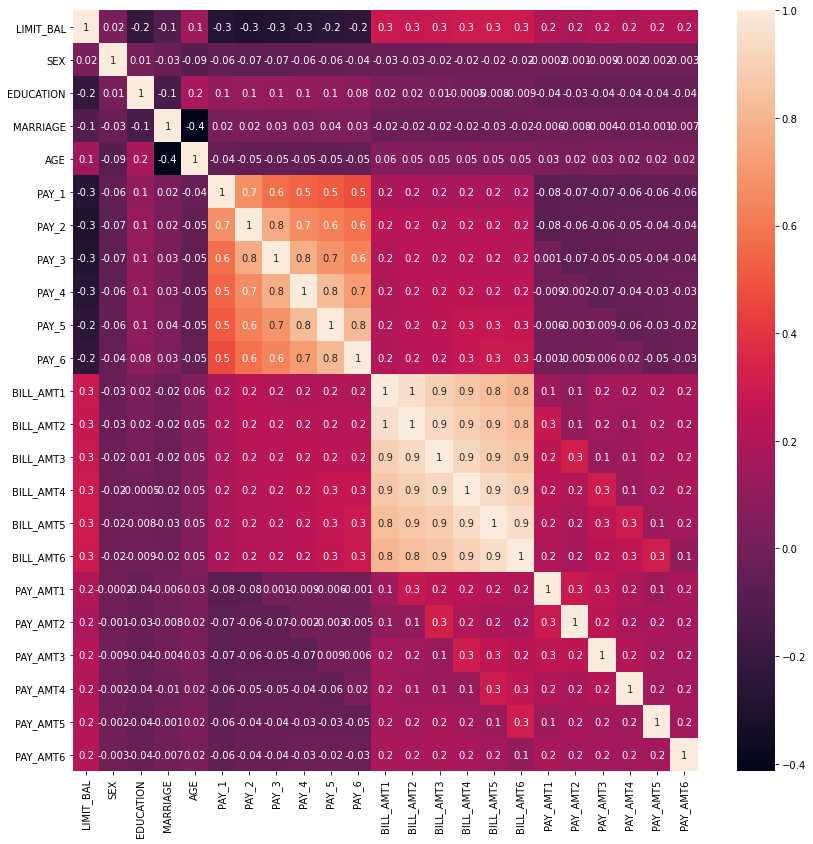

In [11]:
import seaborn as sns

corr = X_features.corr()
plt.figure(figsize = (14, 14))
sns.heatmap(corr, annot = True, fmt = ".1g")


In [12]:
# 높은 상관도의 속성들을 압축

cols_bill = ["BILL_AMT" + str(i) for i in range(1, 7)]

print("cols_bill = ", cols_bill)

scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components = 2)
pca.fit(df_cols_scaled)
print("변동성: ", pca.explained_variance_ratio_)


cols_bill =  ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
변동성:  [0.90555253 0.0509867 ]


In [13]:
rcf = RandomForestClassifier(n_estimators = 300, random_state = 156)
scores = cross_val_score(rcf, X_features, y_target, scoring = "accuracy", cv = 3)

print(scores)
print(np.mean(scores))
# PCA 하기전

[0.8083 0.8196 0.8232]
0.8170333333333333


In [14]:
#PCA 후

scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

pca = PCA(n_components = 6)
df_pca = pca.fit_transform(df_scaled)

scores = cross_val_score(rcf, df_pca, y_target, scoring = "accuracy", cv = 3)

print(scores)
print(np.mean(scores))


[0.7928 0.798  0.8045]
0.7984333333333332


## 03. LDA(Linear Discriminant Analysis)

- 선형 판별 분석법,
- PCA: 입력 데이터의 변동성 가장 큰 축 찾기
- LDA: 입력 데이터의 결정 값 클래스를 최대한 분리할 수 있는 축 찾기
    - 클래스 간 분산 크게, 클래스 내부 분산 작게 (다른 클래스 간에는 떨어져 있고 같은 클래스 데이터들은 모여있음)
    - 공분산 행렬이 아니라 위 두 분산 행렬 생성후 입력 데이터 투영
    


In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

lda = LinearDiscriminantAnalysis(n_components = 2)
lda.fit(iris_scaled, iris.target) # target 들어감
iris_lda = lda.transform(iris_scaled)

print(iris_lda.shape)


(150, 2)


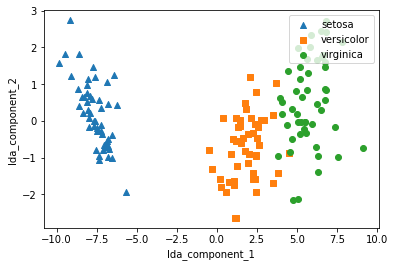

In [16]:
lda_columns = ["lda_component_1", "lda_component_2"]
iris_df_lda = pd.DataFrame(iris_lda, columns = lda_columns)
iris_df_lda["target"] = iris.target

for i, marker in enumerate(markers):
    x_axis_data = iris_df_lda[iris_df_lda["target"] == i]["lda_component_1"]
    y_axis_data = iris_df_lda[iris_df_lda["target"] == i]["lda_component_2"]

    plt.scatter(x_axis_data, y_axis_data, marker = marker, label = iris.target_names[i])

plt.legend(loc = "upper right")
plt.xlabel("lda_component_1")
plt.ylabel("lda_component_2")
plt.show()
# 클래스 내부 모여있고 클래스 간 떨어져 있도록 컴포넌트 설정


## 04. SVD(Singular Value Decomposition)

- PCA 는 행 열 같을 때만(정방행렬) 고유벡터 분해 가능
- SVD: 정방행렬 아니어도 가능


In [17]:
from scipy.sparse.linalg import svds
from scipy.linalg import svd

np.random.seed(121)
matrix = np.random.random((6, 6))
print('원본 행렬:\n',matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:',U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)

num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:',U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr,np.diag(Sigma_tr)), Vt_tr)  
print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 

Text(0, 0.5, 'TruncatedSVD Component 2')

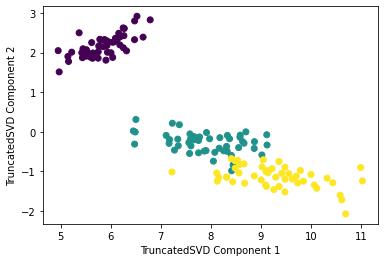

In [18]:
from sklearn.decomposition import TruncatedSVD

iris = load_iris()
iris_ftrs = iris.data
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

plt.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')


Text(0.5, 1.0, 'PCA Transformed')

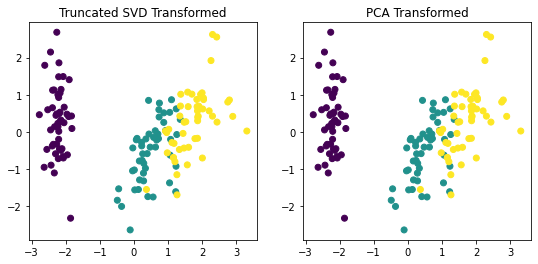

In [19]:

scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
ax2.scatter(x=iris_pca[:,0], y= iris_pca[:,1], c= iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

In [20]:
print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())
# 0 에 가깝, (둘이 비슷)

2.332185370749566e-15
-8.803721640582296e-17


## 05. NMF(Non-Negative Matrix Factorization)

- Truncated SVD 와 같은 행렬 근사 방식
- 0 이상이면 더 간단히 분해할 수 있는 기법 사용


Text(0, 0.5, 'NMF Component 2')

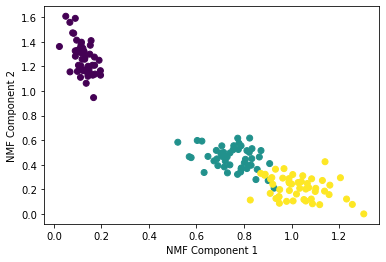

In [21]:
from sklearn.decomposition import NMF

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0], y= iris_nmf[:,1], c= iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')
